In [2]:
!pip3 install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 10.2 MB/s eta 0:00:00m eta 0:00:010:00:01


In [50]:
pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 5.3 MB/s eta 0:00:000m eta 0:00:0136m0:00:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 327.8 kB/s eta 0:00:0031m11.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 8.6 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.7 MB/s eta 0:00:000:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 7.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.0 MB/s eta 0:00:009.4 MB/s eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 149.6 kB/s eta 0:00:001m141.0 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.4 MB/s eta 0

In [4]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 9.1 MB/s eta 0:00:00m eta 0:00:01m0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,InputLayer,AveragePooling2D
from keras.layers import BatchNormalization,Dropout,Activation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

2024-06-18 11:57:13.415386: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-18 11:57:13.415760: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-18 11:57:13.420070: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-18 11:57:13.482272: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 11:57:14.614877: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

###### Read and reshaping pictures

In [2]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

path = '/media/simafard/05034B3D798EFF4B/myGithubfiles/catsDogs/train/'
images = []
labels = []

categories = os.listdir(path)

for label in categories:
    img_directory_path = os.path.join(path, label)
    
    for img in os.listdir(img_directory_path):
        img_path = os.path.join(img_directory_path, img)
        
        # Read the image
        image = cv2.imread(img_path)
        
        # Check if the image was read correctly
        if image is None:
            print(f"Warning: Skipping file {img_path}, image could not be read.")
            continue
        
        # Check if image has a valid shape
        if image.size == 0:
            print(f"Warning: Skipping file {img_path}, image size is zero.")
            continue
        
        # Resize and process the image
        try:
            image = np.array(cv2.resize(image, (50, 50), interpolation=cv2.INTER_AREA))
        except Exception as e:
            print(f"Error resizing image {img_path}: {e}")
            continue
        
        # Rescale the image
        image = image.astype('float32') / 255
        
        # Append the image and label to the lists
        images.append(image)
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = LabelEncoder().fit_transform(labels)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

###### 
Conv2D: Increasing to 128 filters, capturing more complex features.//

MaxPooling2D: Further downsampling to reduce feature map dimensions.

Flatten: Converts the 3D feature maps to a 1D feature vector to feed into dense layers.

Dense: A fully connected layer with 512 units and ReLU activation.

ropout: Dropout layers with rates of 0.25 and 0.5 to reduce overfitting by randomly setting a fraction of input units to 0 during training.

BatchNormalization: Normalizes the inputs to each layer, improving training speed and stability.

Dense: A single neuron with a sigmoid activation function, suited for binary classification.

In [19]:
from keras import layers, models

model = models.Sequential()

# Existing convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))

# Additional convolutional layer
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening the output to transition to dense layers
model.add(layers.Flatten())

# Existing dense layers and regularization
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

# Additional dense layers
model.add(layers.Dense(128, activation='relu'))

# Output layer for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,705 (7.82 MB)

 Trainable params: 2,046,657 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [35]:
import tensorflow as tf

# Define the learning rate variable
learning_rate = tf.Variable(0.001, trainable=False)

# During training, update the learning rate as needed
# For example, set a new learning rate of 0.0001
tf.keras.backend.set_value(learning_rate, 0.001)

In [36]:

history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9953 - loss: 0.0148 - val_accuracy: 0.8542 - val_loss: 0.9543
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.9985 - loss: 0.0057 - val_accuracy: 0.8620 - val_loss: 0.8456
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.9961 - loss: 0.0093 - val_accuracy: 0.8634 - val_loss: 0.8341
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.9987 - loss: 0.0044 - val_accuracy: 0.8600 - val_loss: 0.9633
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.9959 - loss: 0.0114 - val_accuracy: 0.8636 - val_loss: 1.1864
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.9980 - loss: 0.0057 - val_accuracy: 0.8638 - val_loss: 0.9025
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.8646 - val_loss: 2.4905
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.9962 - loss: 0.0110 - 

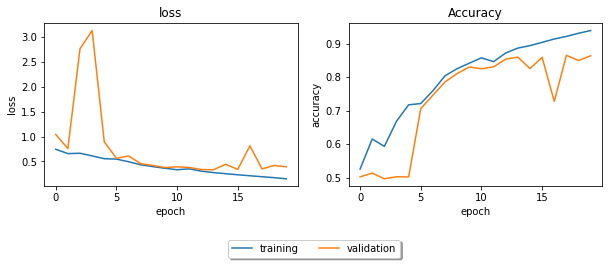

In [22]:
#epoch=20
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))

ax1.plot(history.history['loss'],label = 'training')
ax1.plot(history.history['val_loss'],label = 'validation')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_title('loss')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.set_title('Accuracy')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)


In [28]:
# from keras import layers
# from keras import models

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(50, 50, 3)))

# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))


In [29]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [30]:
# model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 9, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,235,073 (4.71 MB)

 Trainable params: 1,235,073 (4.71 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:

# Train the model
# history = model.fit(xtrained_array, label_array,
#                     epochs=30,
#                     batch_size=32,
#                     validation_split=0.2)

Epoch 1/30


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_3" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (32, 50, 50, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 50, 50, 1), dtype=uint8)
  • training=True
  • mask=None

In [49]:
# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=100,
#       epochs=30,
#       validation_data=validation_generator,
#       validation_steps=50)

ValueError: Argument(s) not recognized: {'lr': 0.0001}